In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv(r'E:\Semester 5\IME692A- Advanced Statistical Methods for Business Analytics\Project\train.csv')

In [3]:
X_train, X_val, y_train, y_val = train_test_split(df.iloc[:,0:-2], df.iloc[:,-1], test_size=0.2,random_state=109) 

In [14]:
test=pd.read_csv(r'E:\Semester 5\IME692A- Advanced Statistical Methods for Business Analytics\Project\test.csv')

In [15]:
X_test=test.iloc[:,0:-2]
y_test=test.iloc[:,-1]

In [7]:
clf=RandomForestClassifier(n_estimators=100)

In [8]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
y_val_pred=clf.predict(X_val)

In [13]:
print("Train Accuracy:",metrics.accuracy_score(y_val, y_val_pred))

Train Accuracy: 0.775


In [16]:
y_pred=clf.predict(X_test)

In [17]:
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Accuracy: 0.767


### ROC Curve

In [18]:
from sklearn.metrics import roc_curve, auc

In [20]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test,y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

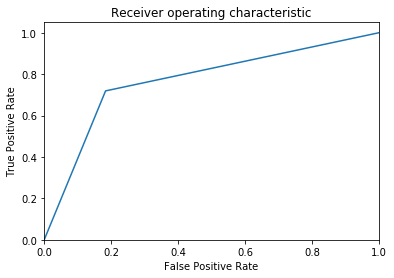

Area under curve: 0.7678787927288442


In [21]:
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
print("Area under curve:",roc_auc[1])